In [1]:

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# To Detect Face in an Image

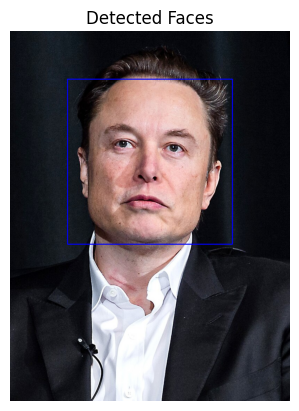

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load the pre-trained face detection classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load an image
image_path = '/content/drive/MyDrive/ColabNotebooks/Projects/0. Facial Recognition/celeb_images/elon/elon_1.jpg'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Display the original image with bounding boxes around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Convert BGR image to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with matplotlib
plt.imshow(image_rgb)
plt.title('Detected Faces')
plt.axis('off')  # Turn off axis labels
plt.show()


# Comparison in Original and Cropped Image

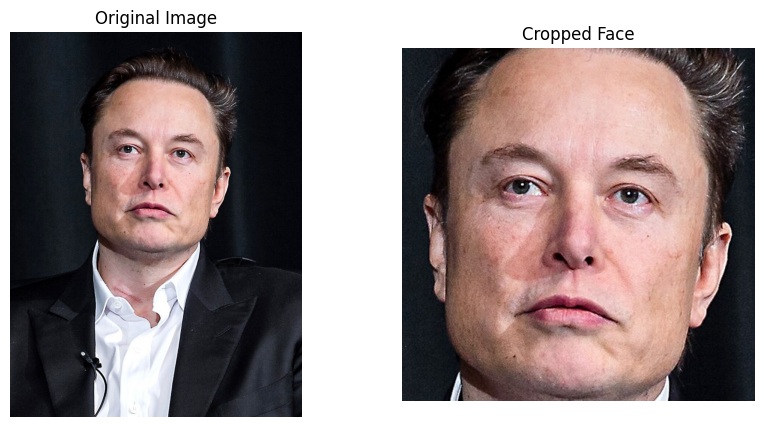

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load the pre-trained face detection classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load an image
image_path = '/content/drive/MyDrive/ColabNotebooks/Projects/0. Facial Recognition/celeb_images/elon/elon_1.jpg'
original_image = cv2.imread(image_path)
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Ensure at least one face is detected
if len(faces) > 0:
    # Get the first detected face (assuming there's only one face in the image)
    x, y, w, h = faces[0]

    # Crop the image to show only the detected face
    cropped_face = original_image[y:y+h, x:x+w]

    # Convert BGR images to RGB for displaying with matplotlib
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    cropped_face_rgb = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB)

    # Display the original image and the cropped face side by side
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cropped_face_rgb)
    plt.title('Cropped Face')
    plt.axis('off')

    plt.show()
else:
    print("No faces detected in the image.")


# HOG

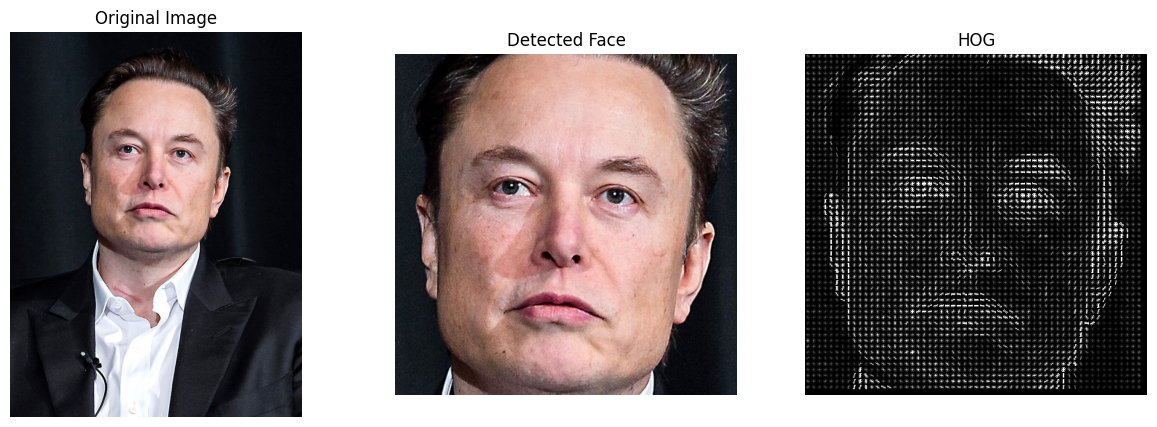

In [4]:
import cv2
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

# Load the pre-trained face detection classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load an image
image_path = '/content/drive/MyDrive/ColabNotebooks/Projects/0. Facial Recognition/celeb_images/elon/elon_1.jpg'
original_image = cv2.imread(image_path)
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Ensure at least one face is detected
if len(faces) > 0:
    # Get the first detected face (assuming there's only one face in the image)
    x, y, w, h = faces[0]

    # Crop the image to show only the detected face
    cropped_face = original_image[y:y+h, x:x+w]

    # Convert BGR images to RGB for displaying with matplotlib
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    cropped_face_rgb = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB)

    # Compute HOG features for the cropped face
    cropped_face_gray = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2GRAY)
    fd, hog_image = hog(cropped_face_gray, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    # Display the original image, cropped face, and HOG of the cropped face
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(original_image_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cropped_face_rgb)
    plt.title('Detected Face')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    plt.title('HOG')
    plt.axis('off')

    plt.show()
else:
    print("No faces detected in the image.")


# Same Dimension For Resultant Images

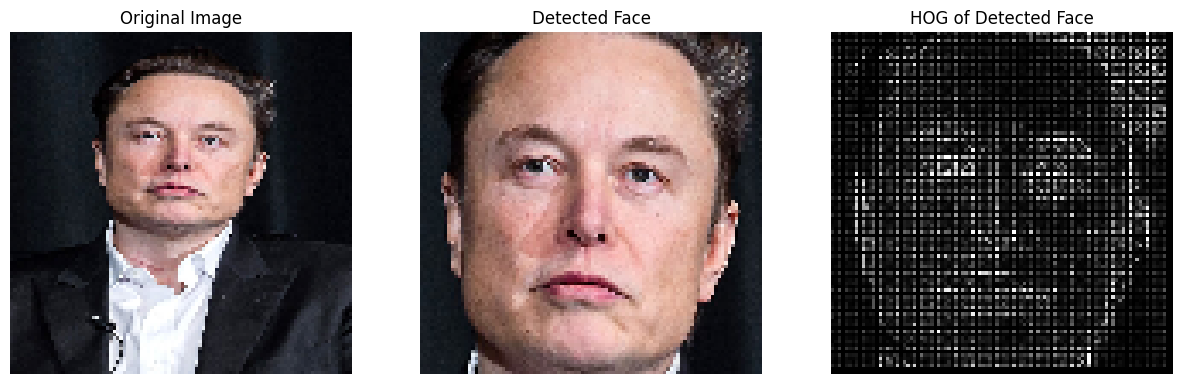

In [6]:
import cv2
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

# Load the pre-trained face detection classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load an image
image_path = '/content/drive/MyDrive/ColabNotebooks/Projects/0. Facial Recognition/celeb_images/elon/elon_1.jpg'
original_image = cv2.imread(image_path)
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Ensure at least one face is detected
if len(faces) > 0:
    # Get the first detected face (assuming there's only one face in the image)
    x, y, w, h = faces[0]

    # Crop the image to show only the detected face
    cropped_face = original_image[y:y+h, x:x+w]

    # Convert BGR images to RGB for displaying with matplotlib
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    cropped_face_rgb = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB)

    # Compute HOG features for the cropped face
    cropped_face_gray = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2GRAY)
    fd, hog_image = hog(cropped_face_gray, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    # Resize all images to the same dimensions
    image_height, image_width = 100, 100
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.resize(original_image_rgb, (image_width, image_height)))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.resize(cropped_face_rgb, (image_width, image_height)))
    plt.title('Detected Face')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.resize(hog_image_rescaled, (image_width, image_height)), cmap=plt.cm.gray)
    plt.title('HOG of Detected Face')
    plt.axis('off')

    plt.show()
else:
    print("No faces detected in the image.")


# Face Landmarks

In [7]:
!pip install face_recognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=8ca15593019038c08e960e02176a8fc2cffee7d75605f47f885853c80dba4d3e
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


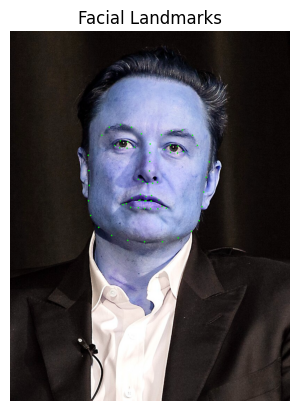

In [8]:

import cv2
import face_recognition
import matplotlib.pyplot as plt

# Load the uploaded image
image_path = '/content/drive/MyDrive/ColabNotebooks/Projects/0. Facial Recognition/celeb_images/elon/elon_1.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Find facial landmarks in the image
face_landmarks_list = face_recognition.face_landmarks(image_rgb)

# Ensure at least one face is detected
if len(face_landmarks_list) > 0:
    # Draw landmarks on the image
    for face_landmarks in face_landmarks_list:
        for landmark_type, landmarks in face_landmarks.items():
            for landmark in landmarks:
                cv2.circle(image, landmark, 2, (0, 255, 0), -1)

    # Display the image with landmarks
    plt.imshow(image)
    plt.title('Facial Landmarks')
    plt.axis('off')
    plt.show()
else:
    print("No faces detected in the image.")


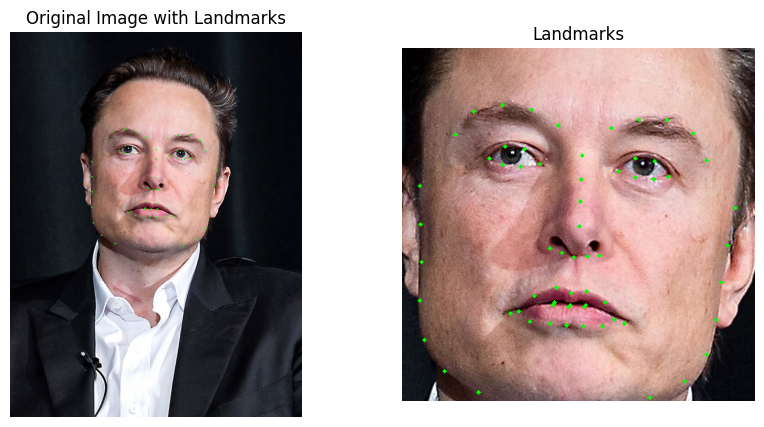

In [13]:
import cv2
import face_recognition
import matplotlib.pyplot as plt
image_path = '/content/drive/MyDrive/ColabNotebooks/Projects/0. Facial Recognition/celeb_images/elon/elon_1.jpg'
original_image = cv2.imread(image_path)

# Convert the image to RGB format for face_recognition library
rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Detect faces in the image
face_locations = face_recognition.face_locations(rgb_image)

# Ensure at least one face is detected
if len(face_locations) > 0:
    # Get the first detected face (assuming there's only one face in the image)
    top, right, bottom, left = face_locations[0]

    # Crop the image to show only the detected face
    cropped_face = original_image[top:bottom, left:right]

    # Find facial landmarks in the cropped face
    face_landmarks = face_recognition.face_landmarks(cropped_face)

    # Ensure at least one face is detected in the cropped face
    if len(face_landmarks) > 0:
        # Draw landmarks on the cropped face
        for landmark_type, landmarks in face_landmarks[0].items():
            for landmark in landmarks:
                cv2.circle(cropped_face, landmark, 2, (0, 255, 0), -1)

        # Convert BGR images to RGB for displaying with matplotlib
        original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
        cropped_face_rgb = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB)

        # Display the original image with landmarks on the cropped face
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(original_image_rgb)
        plt.title('Original Image with Landmarks')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cropped_face_rgb)
        plt.title('Landmarks')
        plt.axis('off')

        plt.show()
    else:
        print("No facial landmarks detected in the cropped face.")
else:
    print("No faces detected in the image.")
